In [1]:
!pip install ppscore


In [75]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps

In [29]:
# Loading the dataset
data = pd.read_csv("C:\\Users\\Ashish\\Downloads\\Data Science Assignments\\EDA2\\adult_with_headers.csv")

In [31]:
# Summary statistics
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [33]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [35]:
# Handling missing values
data = data.fillna(data.median(numeric_only=True))  
data = data.fillna(data.mode().iloc[0])            


In [37]:
# Scaling numerical features
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [39]:
# Standard Scaling
scaler_standard = StandardScaler()
data[num_cols + '_std'] = scaler_standard.fit_transform(data[num_cols])

In [41]:
# Min-Max Scaling
scaler_minmax = MinMaxScaler()
data[num_cols + '_minmax'] = scaler_minmax.fit_transform(data[num_cols])

In [43]:
#Sceanrio for selecting scaling technique

Standard Scaling is ideal for algorithms sensitive to feature magnitude (e.g., SVM).
Min-Max Scaling is preferred when the distribution needs to be preserved (e.g., Neural Networks).

In [47]:
#Encoding Techniques
# Categorical variables
cat_cols = data.select_dtypes(include=['object']).columns


In [49]:
# One-Hot Encoding for categorical variables with less than 5 categories
one_hot_cols = [col for col in cat_cols if data[col].nunique() < 5 and col != 'sex']
data = pd.get_dummies(data, columns=one_hot_cols, drop_first=True)

In [51]:
# Label Encoding for categorical variables with more than 5 categories
label_enc_cols = [col for col in cat_cols if data[col].nunique() >= 5] + ['sex']
le = LabelEncoder()
for col in label_enc_cols:
    if col in data.columns:
        data[col] = le.fit_transform(data[col])

In [53]:
#Pros and Cons of One-Hot Encoding and Label Encoding.

One-Hot Encoding increases dimensionality but avoids ordinal bias.
Label Encoding introduces ordinal bias but is efficient for high-cardinality features.

In [55]:
#Feature Engineering

if len(num_cols) >= 2:
    data['interaction_term'] = data[num_cols[0]] * data[num_cols[1]]

In [57]:

if len(cat_cols) > 0:
    data['cat_length'] = data[cat_cols[0]].apply(lambda x: len(str(x)))

In [59]:
# Log Transformation for skewed numerical features
skewed_feature = data[num_cols].skew().idxmax()
data[f'{skewed_feature}_log'] = np.log1p(data[skewed_feature])
print(f"Applied log transformation to {skewed_feature} due to skewness.")

Applied log transformation to capital_gain due to skewness.


In [61]:
#Feature Selection
# Isolation Forest for outlier removal
isolation_forest = IsolationForest(contamination=0.05)
data['outlier'] = isolation_forest.fit_predict(data[num_cols])
data = data[data['outlier'] == 1].drop(columns=['outlier'])

In [63]:
# PPS Analysis
pps_matrix = pps.matrix(data).pivot(columns='x', index='y', values='ppscore')
print("\nPPS Matrix:")
print(pps_matrix)


PPS Matrix:
x                           age  age_minmax   age_std  capital_gain  \
y                                                                     
age                    1.000000    0.999945  0.999945      0.003649   
age_minmax             0.999945    1.000000  0.999945      0.003649   
age_std                0.999945    0.999945  1.000000      0.003649   
capital_gain           0.000000    0.000000  0.000000      1.000000   
capital_gain_log       0.000000    0.000000  0.000000      0.998167   
capital_gain_minmax    0.000000    0.000000  0.000000      0.995445   
capital_gain_std       0.000000    0.000000  0.000000      0.995445   
capital_loss           0.000000    0.000000  0.000000      0.000000   
capital_loss_minmax    0.000000    0.000000  0.000000      0.000000   
capital_loss_std       0.000000    0.000000  0.000000      0.000000   
cat_length             0.000000    0.000000  0.000000      0.000000   
education              0.000000    0.000000  0.000000      0.000

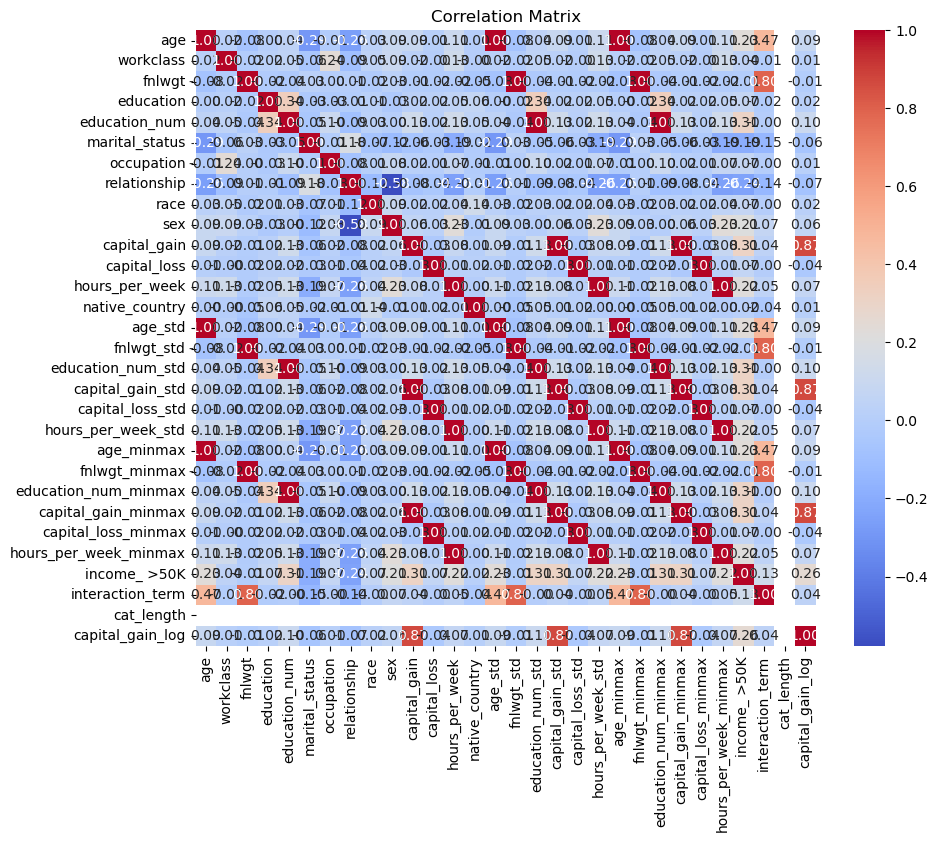

In [65]:
# Compare PPS with correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

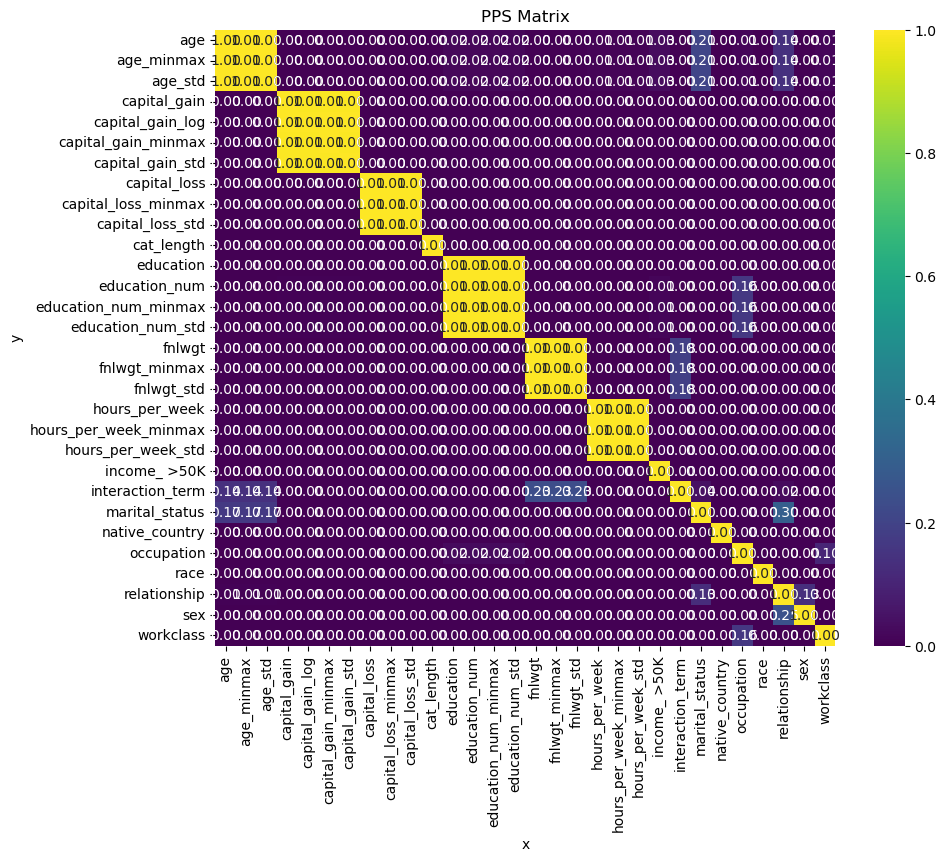

In [67]:
# Visualization of PPS matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pps_matrix, annot=True, fmt='.2f', cmap='viridis')
plt.title('PPS Matrix')
plt.show()

In [ ]:
#Key Differences:

PPS captures both linear and non-linear relationships, making it suitable for a wider variety of interactions.
Correlation only captures linear relationships between features.

In [ ]:
#---------------------------------------FINSIH-------------------------------------!